In [155]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import requests
from pathlib import Path
from datascience import *

In [156]:
spkrDir = Path('/Users/cun-yuwang/Desktop/csvs')
speakers = pd.read_csv(spkrDir/'allspeakers.csv')
spchDir = Path('/Users/cun-yuwang/Desktop/csvs')
speeches = pd.read_csv(spchDir/'allspeeches.csv')

# Number of Speeches Made

In [157]:
speech_count = speeches.groupby(['first_name', 'last_name', 'speaker_id']).count()
speech_count = speech_count[['Unnamed: 0']]
speech_count = speech_count.rename(index=str, columns={"Unnamed: 0": "Number of Speeches"})

In [214]:
speech_count.describe()

,Number of Speeches
count,448.000000
mean,71.645089
std,86.034234
min,1.000000
25%,20.000000
50%,47.000000
75%,91.250000
max,722.000000


In [159]:
name_num_speeches = speech_count.reset_index()

In [ ]:
# last_name = 'JAYAPAL'
# first_name = 'Pramila'
# name_num_speeches[(name_num_speeches['first_name'] == first_name) & (name_num_speeches['last_name'] == last_name)]

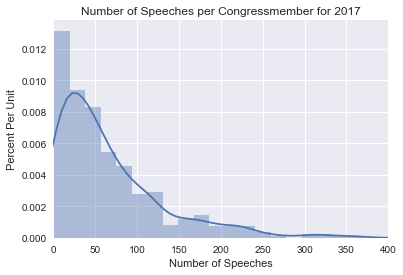

In [205]:
sns.distplot(name_num_speeches['Number of Speeches'])
plt.xlim(0, 400)
plt.ylabel('Percent Per Unit')
plt.xlabel('Number of Speeches')
plt.title('Number of Speeches per Congressmember for 2017')

# Word Count

### Total Words

In [162]:
total_words = speeches.groupby(['first_name', 'last_name']).sum().drop(
    ['Unnamed: 0', 'speech_id', 'speaker_id', 'year', 'day'], 1).rename(index=str, columns={"word_count": "Word Count"})

In [163]:
total_words.describe()

,Word Count
count,447.000000
mean,33430.044743
std,59424.468255
min,11.000000
25%,5884.000000
50%,14037.000000
75%,33656.500000
max,615842.000000


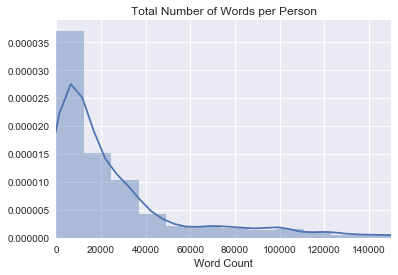

In [164]:
total_words = total_words.reset_index()
sns.distplot(total_words['Word Count'])
plt.xlim(0, 150000)
plt.title('Total Number of Words per Person')

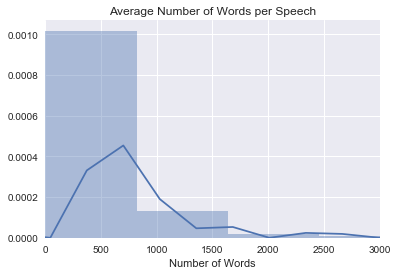

In [166]:
word_total = total_words['Word Count']
speech_total = speech_count.reset_index()['Number of Speeches']
avg_word_per_speech = word_total / speech_total
total_words['Number of Words'] = avg_word_per_speech
sns.distplot(total_words['Number of Words'])
plt.xlim(0, 3000)
plt.title('Average Number of Words per Speech')

In [167]:
avg_word_per_speech.describe()

count      447.000000
mean       808.473210
std       2812.065127
min          0.224490
25%        219.651852
50%        301.318681
75%        623.037296
max      40974.200000
dtype: float64

# Change in activity over time

In [206]:
speeches_by_month = speeches[(speeches['year'] == 2017) & (speeches['last_name'] == 'SANDERS') ].groupby(['first_name', 'last_name', 'speaker_id', 'month']).count()

In [207]:
speeches_by_month = speeches_by_month.rename(index=str, columns={"Unnamed: 0": "Number of Speeches"})

In [209]:
d = {'January':1, 'February':2, 'March':3, 'April':4, "May": 5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December': 12 }

In [210]:
speeches_by_month = speeches_by_month.reset_index()
speeches_by_month['month'] = speeches_by_month['month'].map(d)

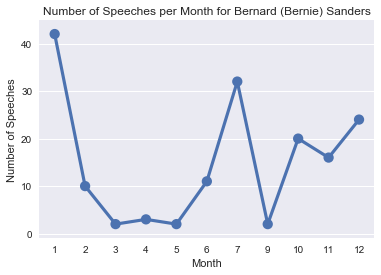

In [212]:
x = speeches_by_month['month']
y = speeches_by_month['Number of Speeches']
sns.pointplot(x, y)
plt.title('Number of Speeches per Month for Bernard (Bernie) Sanders')
plt.ylabel('Number of Speeches')
plt.xlabel('Month')

In [177]:
total_words = speeches.groupby(['first_name', 'last_name', 'month']).sum().rename(index=str, columns={"word_count": "Word Count"})

In [178]:
total_words = total_words.reset_index()

In [179]:
total_words = total_words[total_words['last_name'] == 'SANDERS']

In [180]:
total_words['month'] = total_words['month'].map(d)

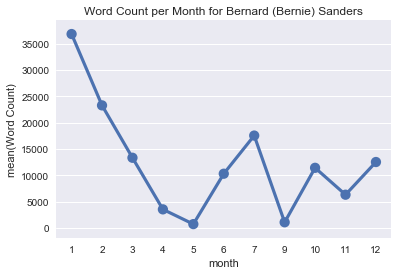

In [182]:
sns.pointplot(total_words['month'], total_words['Word Count'])
plt.title('Word Count per Month for Bernard (Bernie) Sanders')